<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import initializers

import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

batch_size = 128
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


def remove_numbers(x,y,list_of_numbers_to_keep):
    y_df = pd.DataFrame(y,columns=['Label'])
    y_df = y_df[y_df['Label'].apply(str).isin(list_of_numbers_to_keep)]
    x = x[y_df.index,:,:,:]
    y = y_df.to_numpy()
    return x,y.flatten()

num_to_keep = ['0','1']
num_classes = len(num_to_keep)
x_train,y_train = remove_numbers(x_train,y_train,num_to_keep)
x_test,y_test = remove_numbers(x_test,y_test,num_to_keep)

# # convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
    

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
initializer = initializers.RandomUniform(minval=-2, maxval=2, seed=None)

def baseline_model(name,num_classes=2):
    model = Sequential(name=name)
    model.add(Conv2D(2, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28,28,1),kernel_initializer=initializer))
    model.add(MaxPooling2D(pool_size=(7, 7)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_initializer=initializer))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

baseline_model('test').summary()

## Original model before pruning
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=(28,28,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

Model: "test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 2)           0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 2)           0         
_________________________________________________________________
flatten (Flatten)            (None, 18)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 38        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [3]:
import random
rand_numbers = random.sample(range(0, 1000), 100)
rand_numbers
x_test2 = x_test[rand_numbers,:,:,:]
y_test2 = y_test[rand_numbers,:]

In [4]:
from utils import *

In [ ]:
train_model_iteratively(baseline_model,x_train,y_train,x_test2,y_test2,'./data/tmp_cnn',epochs=4,num_models=10)

In [ ]:
yDF = pd.DataFrame(y_test2,columns=['Actual Label 0','Actual Label 1'])
yDF['point']=range(100)
y_pred = pd.read_csv('./data/tmp_cnn/predictions.csv')
y_pred.rename({y_pred.columns[0]:'point'},axis=1,inplace=True)
y_pred2 = pd.merge(yDF,y_pred,left_on='point',right_on='point')
y_pred2.to_csv('./data/tmp_cnn/predictions2.csv')

In [5]:
model_weights=get_model_weights('./data/tmp_cnn')

model.9-3-30.14.hdf5
model.0-3-1767.74.hdf5
model.4-3-14.55.hdf5
model.7-1-939.73.hdf5
model.4-1-55.30.hdf5
model.1-1-95.44.hdf5
model.6-3-87.12.hdf5
model.7-3-260.80.hdf5
model.3-3-68.40.hdf5
model.1-3-29.01.hdf5
model.5-1-40.59.hdf5
model.2-1-46.65.hdf5
model.8-1-263.01.hdf5
model.3-1-826.54.hdf5
model.8-3-94.53.hdf5
model.5-3-8.21.hdf5
model.0-1-3735.37.hdf5
model.6-1-216.65.hdf5
model.9-1-203.19.hdf5
model.2-3-19.03.hdf5


In [6]:
model_weights[list(model_weights.keys())[0]]['conv_kernel_0'].flatten().shape

(18,)

In [7]:
model_weights[list(model_weights.keys())[0]]['conv_kernel_0'].shape

(3, 3, 1, 2)

In [8]:
df_tot = convert_weight_dict_to_dataframe(model_weights)

In [9]:
df_tot.columns

Index(['model_id', 'epoch', 'val_loss', 'conv_kernel_0_0', 'conv_kernel_0_1',
       'conv_kernel_0_2', 'conv_kernel_0_3', 'conv_kernel_0_4',
       'conv_kernel_0_5', 'conv_kernel_0_6', 'conv_kernel_0_7',
       'conv_kernel_0_8', 'conv_kernel_0_9', 'conv_kernel_0_10',
       'conv_kernel_0_11', 'conv_kernel_0_12', 'conv_kernel_0_13',
       'conv_kernel_0_14', 'conv_kernel_0_15', 'conv_kernel_0_16',
       'conv_kernel_0_17', 'dense_kernel_0_0', 'dense_kernel_0_1',
       'dense_kernel_0_2', 'dense_kernel_0_3', 'dense_kernel_0_4',
       'dense_kernel_0_5', 'dense_kernel_0_6', 'dense_kernel_0_7',
       'dense_kernel_0_8', 'dense_kernel_0_9', 'dense_kernel_0_10',
       'dense_kernel_0_11', 'dense_kernel_0_12', 'dense_kernel_0_13',
       'dense_kernel_0_14', 'dense_kernel_0_15', 'dense_kernel_0_16',
       'dense_kernel_0_17', 'dense_kernel_0_18', 'dense_kernel_0_19',
       'dense_kernel_0_20', 'dense_kernel_0_21', 'dense_kernel_0_22',
       'dense_kernel_0_23', 'dense_kernel_0_24

In [10]:
#I ran this with tensorflow version of gp. Have since removed it to work with sci-kit learn. Need Marcio's help.
compute_morse_graph(df_tot[['epoch','conv_kernel_0_0','dense_kernel_0_35']])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
tf.Tensor(
[[-0.78870941 -0.79652568]
 [ 0.05471621  0.33821719]
 [ 0.40622661  0.13537809]
 [ 0.24242713 -0.36609205]
 [-0.07573606  0.30662547]
 [ 0.03276021  0.70304155]
 [ 0.58963365 -0.21580136]
 [-0.92425763 -0.69835508]
 [ 0.96210046  0.32679323]
 [ 0.44835532  0.26746304]], shape=(10, 2), dtype=float64)
X
<class 'list'>
<class 'numpy.ndarray'>


InvalidArgumentError: Requires start <= limit when delta > 0: 1/0 [Op:Range]

In [15]:
morseg,mapg=compute_morse_graph(df_tot[['epoch','conv_kernel_0_0','dense_kernel_0_35']])

[-1.16135874 -1.24105466]


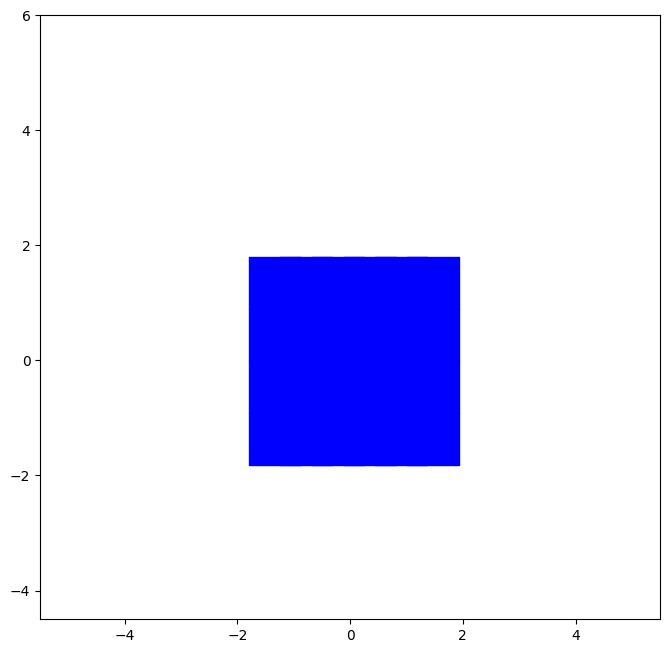

In [21]:
import CMGDB
CMGDB.PlotMorseSets(morseg, xlim=[-5.5, 5.5], ylim=[-4.5, 6])

In [ ]:
import seaborn as sns

In [ ]:
sns.scatterplot(x='pca_comp1',y='pca_comp1',hue='epoch',data=df2)

In [ ]:
'Time' in 'Timepoint'

In [ ]:
str.contains('Time','Timepoint')